In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sco
import datetime

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
plt.rcParams['figure.dpi'] = 150
np.set_printoptions(precision=4, suppress=True)
pd.options.display.float_format = '{:.4f}'.format

In [3]:
def display_table(x):
    with pd.option_context('display.latex.repr', True):
        display(x)

In [4]:
import yfinance as yf
import pandas_datareader as pdr
import requests_cache
session = requests_cache.CachedSession()

In [5]:
# performance measures
def annual_return(r):
    years = (r.index[-1] - r.index[0]).days / 365.25
    return (1 + r).product() ** (1/years) - 1


def total_return(r):
    return (1 + r).prod() - 1


def annual_volatility(r):
    return np.sqrt(12) * r.std()


def sharpe_ratio(r):
    return np.sqrt(12) * r.mean() / r.std()


# drawdown is value today relative to previous max value
def drawdown(r):
    value = (1 + r).cumprod()
    return value / value.cummax() - 1


def max_drawdown(r):
    return drawdown(r).min()


def calmar_ratio(r):
    return annual_return(r) / np.abs(max_drawdown(r))


def sortino_ratio(r):
    negr = r.loc[r < 0]
    return np.sqrt(12) * r.mean() / negr.std()

In [6]:
brk = yf.download(tickers = 'BRK-A', session = session)

brk_monthly = brk.resample('M').last()
brk_monthly['ret'] = brk_monthly['Adj Close'].pct_change()
# brk_monthly

[*********************100%***********************]  1 of 1 completed


In [7]:
ff_all = pdr.get_data_famafrench('F-F_Research_Data_Factors', start = '1980', session = session)

ff = ff_all[0] / 100
ff.index = ff.index.to_timestamp(freq = 'M')
# ff

In [8]:
portfolios_all = pdr.get_data_famafrench('Portfolios_Formed_on_BE-ME', start = '1980', session = session)

portfolios = portfolios_all[0] / 100
portfolios.index = portfolios.index.to_timestamp(freq = 'M')
portfolios.drop(columns = portfolios.columns[np.arange(9)], inplace = True)

df = brk_monthly.join([ff, portfolios], how = 'inner')

display(df)

,Open,High,Low,Close,Adj Close,Volume,ret,Mkt-RF,SMB,HML,...,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,,,
1980-03-31,270.0000,280.0000,260.0000,260.0000,260.0000,100,NaN,-0.1290,-0.0664,-0.0101,...,-0.0917,-0.0948,-0.1300,-0.1191,-0.1228,-0.0948,-0.1192,-0.1186,-0.1357,-0.1805
1980-04-30,275.0000,275.0000,275.0000,275.0000,275.0000,0,0.0577,0.0397,0.0105,0.0108,...,0.0348,0.0429,0.0460,0.0356,0.0448,0.0720,0.0776,0.0838,0.0611,0.0198
1980-05-31,320.0000,340.0000,320.0000,320.0000,320.0000,100,0.1636,0.0526,0.0213,0.0038,...,0.0584,0.0574,0.0655,0.0512,0.0665,0.0559,0.0494,0.0586,0.0802,0.0670
1980-06-30,305.0000,305.0000,305.0000,305.0000,305.0000,0,-0.0469,0.0306,0.0166,-0.0076,...,0.0289,0.0344,0.0378,0.0515,0.0361,0.0151,0.0550,0.0332,0.0218,0.0279
1980-07-31,340.0000,340.0000,340.0000,340.0000,340.0000,0,0.1148,0.0649,0.0414,-0.0641,...,0.1210,0.1079,0.0656,0.0757,0.0389,0.0605,0.0606,0.0168,0.0348,0.0836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,435053.0000,436512.0000,431714.0000,432902.0000,432902.0000,21,0.0523,0.0665,-0.0228,-0.0044,...,0.0920,0.0632,0.0614,0.0360,0.0070,0.0448,0.0463,0.0571,0.0733,0.0399
2021-11-30,423823.0000,426125.0000,416546.0000,416876.0000,416876.0000,19,-0.0370,-0.0155,-0.0135,-0.0053,...,0.0145,-0.0314,-0.0321,-0.0221,-0.0358,-0.0145,-0.0526,-0.0296,-0.0553,-0.0612
2021-12-31,449945.0000,455910.0000,449945.0000,450662.0000,450662.0000,15,0.0810,0.0310,-0.0157,0.0323,...,0.0084,0.0569,0.0462,0.0643,0.0598,0.0657,0.0476,0.0668,0.0283,0.0227


In [9]:
BEME_list = portfolios.columns.to_list()
dfrf = df['RF']
dfr = df[BEME_list + ['RF']]

dfr_b07 = dfr[dfr.index <= datetime.datetime(2007, 12, 31)]
dfr_a07 = dfr[dfr.index >= datetime.datetime(2008, 1, 1)]
dfrf_b07 = dfrf[dfrf.index <= datetime.datetime(2007, 12, 31)]
dfrf_a07 = dfrf[dfrf.index >= datetime.datetime(2008, 1, 1)]
brk_monthly_b07 = brk_monthly[brk_monthly.index <= datetime.datetime(2007, 12, 31)]
brk_monthly_a07 = brk_monthly[brk_monthly.index >= datetime.datetime(2008, 1, 1)]

In [10]:
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

def get_portf_sr(w, avg_rtns, cov_mat):
    return get_portf_rtn(w, avg_rtns) / get_portf_vol(w, cov_mat)

def get_portf_ttl_rtn(w, rtns):
    rtn_vec = rtns.dot(w)
    return total_return(rtn_vec)

In [11]:
def replication(dfr_input, dfrf_input, brk_input):

    avg_returns = 12 * dfr_input.mean()
    cov_mat = 12 * dfr_input.cov()
    # initial_weight = np.ones(dfr_input.shape[1]) / dfr_input.shape[1]
    initial_weight = np.ones(dfr_input.shape[1] - 1) / (dfr_input.shape[1] - 1)  # equal weights
    initial_weight = np.append(initial_weight, 0.0)

    bounds = list((0, 1) for i in range(10))
    bounds = bounds + [(-1, 1)]
    bounds = tuple(bounds)

    target_return = total_return(brk_input['ret'])
    res = sco.minimize(
        fun=get_portf_vol,   # function we want to minimize the output of
        x0=initial_weight,  # first set of portfolio weights
        args=(cov_mat),  # additional arguments for "fun"
        # bounds=tuple((0,1) for i in avg_returns),# bounds for each portfolio weight
        bounds=bounds,  # bounds for each portfolio weight
        constraints=(
            # {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # we want this lambda function to evaluate to 0
            {'type': 'eq', 'fun': lambda x: np.sum(x[0:10]) + x[-1] - 1},
            {'type': 'eq', 'fun': lambda x: get_portf_ttl_rtn(x, dfr_input) - target_return}
            # we want this lambda function to evaluate to 0
        )
    )
    assert res['success']

    portfolio_return = dfr_input.dot(res['x'])
    best_w_p = np.sum(res['x'][0:10])
    best_w_rf = res['x'][-1]
    dec_weight = res['x'][0:10] / np.sum(res['x'][0:10])
    all_weight = res['x']

    return best_w_p, best_w_rf, dec_weight, all_weight

In [12]:
best_w_p_b07, best_w_rf_b07, dec_weight_b07, all_weight_b07 = replication(dfr_b07, dfrf_b07, brk_monthly_b07)
best_w_p_a07, best_w_rf_a07, dec_weight_a07, all_weight_a07 = replication(dfr_a07, dfrf_a07, brk_monthly_a07)

replication_b07_return = dfr_b07.dot(all_weight_b07)
replication_a07_return = dfr_a07.dot(all_weight_a07)

<BarContainer object of 11 artists>

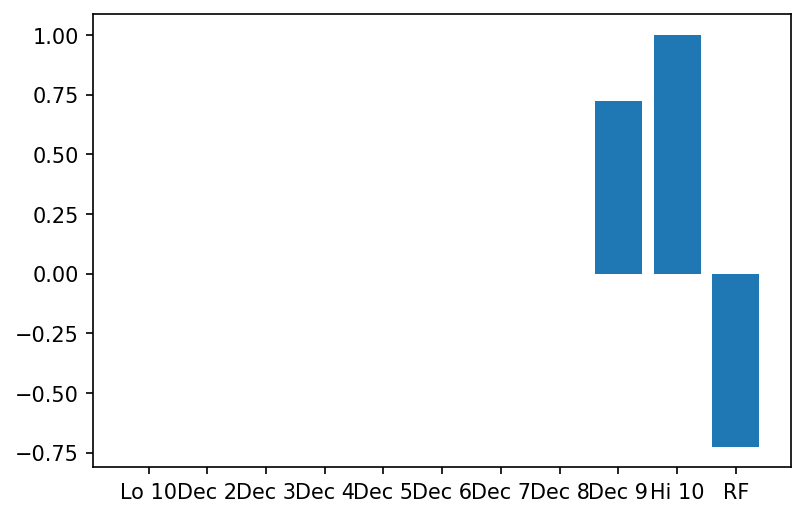

In [13]:
plt.bar(dfr.columns, all_weight_b07)

<BarContainer object of 11 artists>

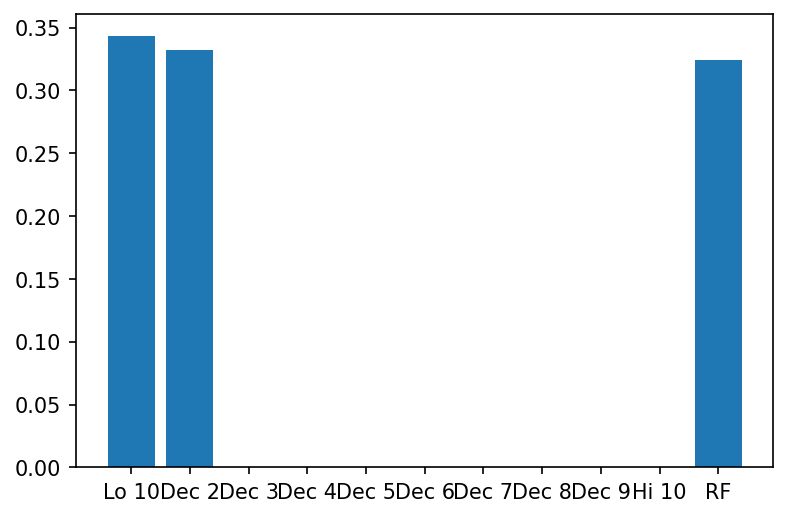

In [14]:
plt.bar(dfr.columns, all_weight_a07)

### Weight Analysis
Before financial crisis, to match BRK's return, the replicated portfolio needs to concentrate more on higher book-to-market ratio stocks, and the portfolio's return is not high enough to beat Warren Buffett, we even need to borrow money and use leverage to increase the return. However, after the financial crisis, no need to borrow money again and we can have some money to lend out. The portfolio weight was more concentrated to lower book-to-market ratio stocks.

Berkshire's investing style diverted from aggressive to relatively conservative, they kept a significant amount of cash in case of extreme market condition happens.

In [15]:
def plot_cumulative_return(r):
    (1 + r).cumprod().plot()
    plt.title('Cumulative Return on $1 Investment')
    plt.ylabel('Cumulative Return ($)')
    plt.axhline(1, color='k', linestyle='--')
    plt.show()
    return None

def tear_sheet(r, plots=True):
    dic = {
        'Annual Return': annual_return(r),
        'Total Return': total_return(r),
        'Annual Volatility': annual_volatility(r),
        'Sharpe Ratio': sharpe_ratio(r),
        'Calmar Ratio': calmar_ratio(r),
        'Max Drawdown': max_drawdown(r),
        'Sortino Ratio': sortino_ratio(r),
    }
    df = pd.DataFrame(data=dic.values(), columns = ['Backtest'], index=dic.keys())
    # display(df)
    print(df)
    if plots:
        plot_cumulative_return(r)
    return None

                   Backtest
Annual Return        0.2549
Total Return       543.6154
Annual Volatility    0.2674
Sharpe Ratio         0.9942
Calmar Ratio         0.4726
Max Drawdown        -0.5393
Sortino Ratio        1.2011


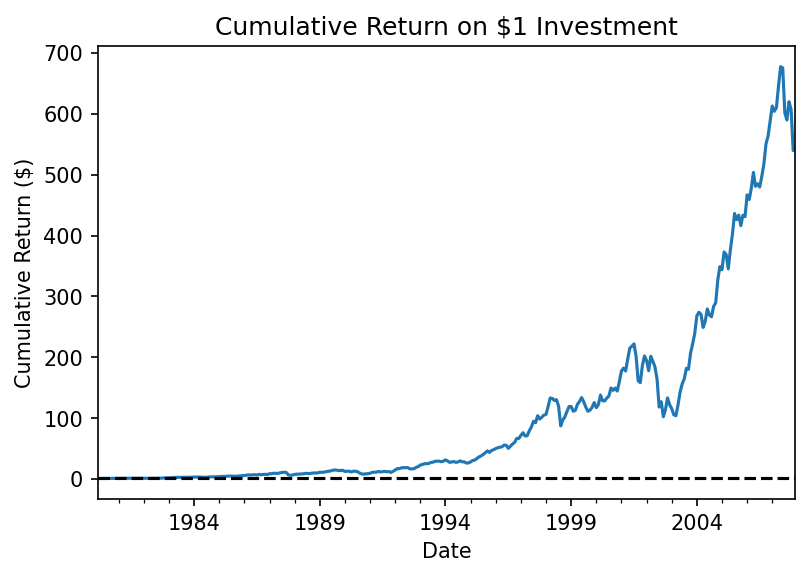

In [16]:
tear_sheet(replication_b07_return)

                   Backtest
Annual Return        0.2549
Total Return       543.6154
Annual Volatility    0.2375
Sharpe Ratio         1.0788
Calmar Ratio         0.5817
Max Drawdown        -0.4381
Sortino Ratio        1.9104


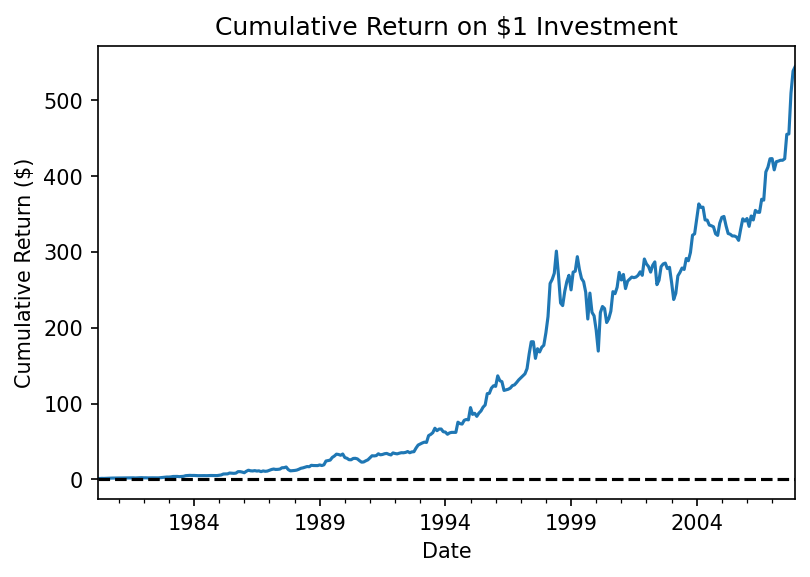

In [17]:
tear_sheet(brk_monthly_b07['ret'])

                   Backtest
Annual Return        0.0914
Total Return         2.4257
Annual Volatility    0.1073
Sharpe Ratio         0.8667
Calmar Ratio         0.3180
Max Drawdown        -0.2874
Sortino Ratio        1.2038


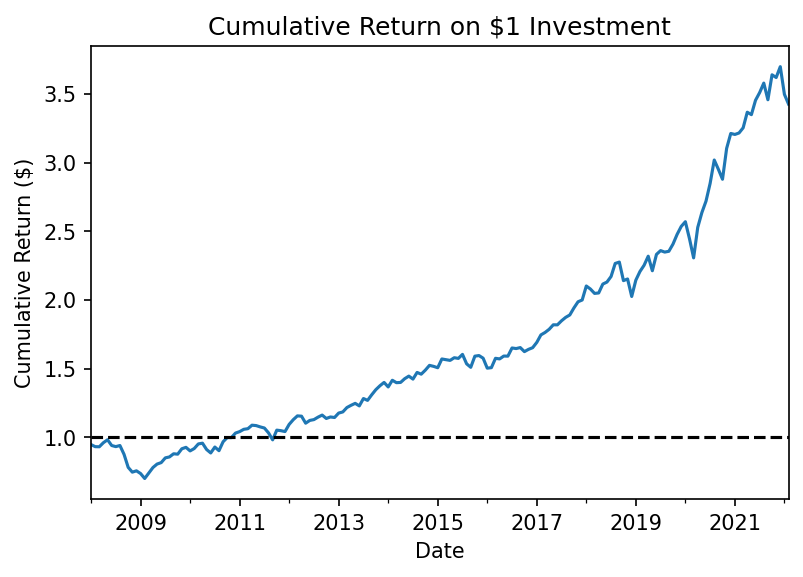

In [18]:
tear_sheet(replication_a07_return)

                   Backtest
Annual Return        0.0897
Total Return         2.4257
Annual Volatility    0.1769
Sharpe Ratio         0.5717
Calmar Ratio         0.2046
Max Drawdown        -0.4386
Sortino Ratio        1.0147


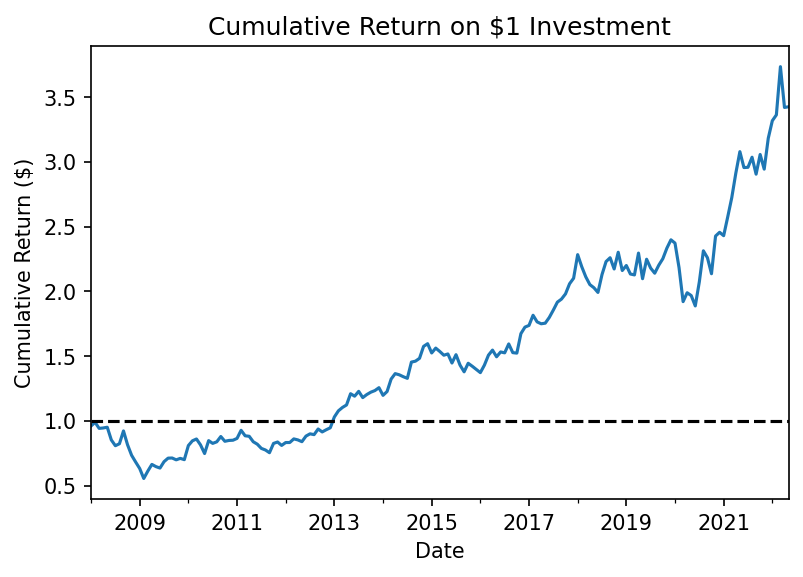

In [19]:
tear_sheet(brk_monthly_a07['ret'])

### Comparison

Before 2007, BRK’s performance was extraordinary, the replication portfolio can match their return but the volatility and risk were higher than BRK. Plus, we need to take leverage and borrow money from market to increase our return to match BRK’s return before financial crisis. However, after the crisis we did not need to borrow money anymore to compete BRK’s return, and the replication portfolio has a less volatility and higher Sharpe and Sortino ratio than BRK’s.

In [20]:
# BRK 5 year rolling window
annual_return_rolling5y = []
sharpe_ratio_rolling5y = []
calmar_ratio_rolling5y = []
mdd_rolling5y = []
sortino_ratio_rolling5y = []

for i in range(60, len(brk_monthly)):
    start = i - 60
    end = i
    window_brk_monthly = brk_monthly.iloc[start:end]['ret']
    annual_return_rolling5y.append(annual_return(window_brk_monthly))
    sharpe_ratio_rolling5y.append(sharpe_ratio(window_brk_monthly))
    calmar_ratio_rolling5y.append(calmar_ratio(window_brk_monthly))
    mdd_rolling5y.append((max_drawdown(window_brk_monthly)))
    sortino_ratio_rolling5y.append((sortino_ratio(window_brk_monthly)))

df_BRK_5y = pd.DataFrame()
df_BRK_5y.index = brk_monthly.index[60:]
df_BRK_5y['time'] = df_BRK_5y.index
df_BRK_5y['annual_return'] = annual_return_rolling5y
df_BRK_5y['sharpe_ratio'] = sharpe_ratio_rolling5y
df_BRK_5y['calmar_ratio'] = calmar_ratio_rolling5y
df_BRK_5y['max_drawdown'] = mdd_rolling5y
df_BRK_5y['sortino_ratio'] = sortino_ratio_rolling5y
display(df_BRK_5y)

,time,annual_return,sharpe_ratio,calmar_ratio,max_drawdown,sortino_ratio
Date,,,,,,
1985-03-31,1985-03-31,0.4265,1.6388,2.4526,-0.1739,4.3675
1985-04-30,1985-04-30,0.4846,1.7072,2.7867,-0.1739,4.7879
1985-05-31,1985-05-31,0.4738,1.6770,2.7246,-0.1739,4.7010
1985-06-30,1985-06-30,0.4304,1.5926,2.4746,-0.1739,4.3433
1985-07-31,1985-07-31,0.4879,1.7353,2.8056,-0.1739,4.7231
...,...,...,...,...,...,...
2022-01-31,2022-01-31,0.1329,0.7869,0.6241,-0.2129,1.4591
2022-02-28,2022-02-28,0.1405,0.8241,0.6599,-0.2129,1.5327
2022-03-31,2022-03-31,0.1336,0.7911,0.6277,-0.2129,1.4660


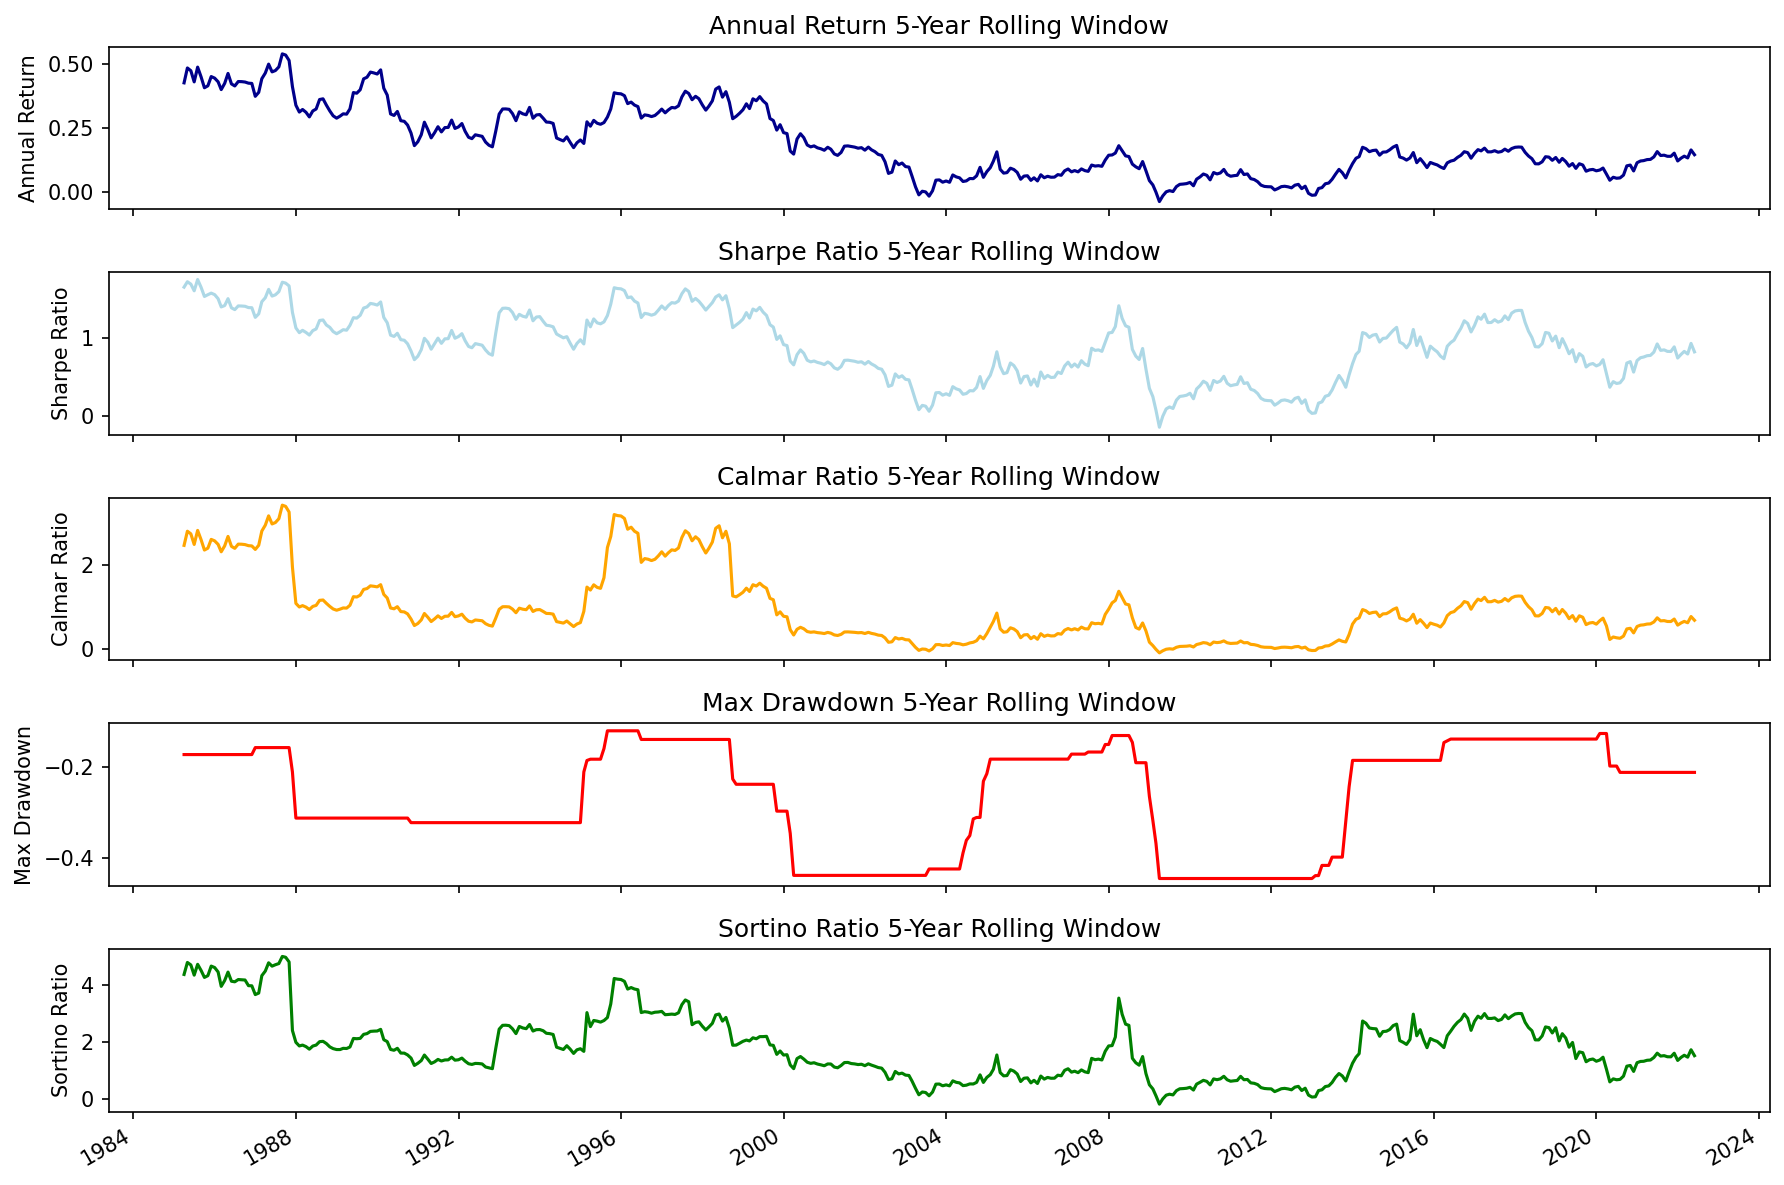

In [21]:
# plot
fig = plt.figure(figsize=(12.0, 8.0))
ax1 = plt.subplot(511)
ax1.plot(df_BRK_5y['time'], df_BRK_5y['annual_return'], c='darkblue')
fig.autofmt_xdate()
ax1.set_ylabel('Annual Return')
plt.title('Annual Return 5-Year Rolling Window')
plt.tight_layout()

ax2 = plt.subplot(512)
ax2.plot(df_BRK_5y['time'], df_BRK_5y['sharpe_ratio'], c='lightblue')
fig.autofmt_xdate()
ax2.set_ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio 5-Year Rolling Window')
plt.tight_layout()

ax3 = plt.subplot(513)
ax3.plot(df_BRK_5y['time'], df_BRK_5y['calmar_ratio'], c='orange')
fig.autofmt_xdate()
ax3.set_ylabel('Calmar Ratio')
plt.title('Calmar Ratio 5-Year Rolling Window')
plt.tight_layout()

ax4 = plt.subplot(514)
ax4.plot(df_BRK_5y['time'], df_BRK_5y['max_drawdown'], c='red')
fig.autofmt_xdate()
ax4.set_ylabel('Max Drawdown')
plt.title('Max Drawdown 5-Year Rolling Window')
plt.tight_layout()

ax5 = plt.subplot(515)
ax5.plot(df_BRK_5y['time'], df_BRK_5y['sortino_ratio'], c='green')
fig.autofmt_xdate()
ax5.set_ylabel('Sortino Ratio')
plt.title('Sortino Ratio 5-Year Rolling Window')
plt.tight_layout()

### Repeatability

The 5-year rolling window plots showed the repeatability is generally good but not excellent. Annual return swings from near 50% to less than 10%. Earlier years were easier to obtain higher return, and the Sharpe ratio and Sortino ratio were also very high. After 2007-2008 financial crisis, the BRK’s stock return dropped significantly. There were mainly 3 golden period, pre-1988, 1996-2000, and 2014-2020. Returns were high and drawdowns were low during these 3 periods, but generally the returns kept going down even in the golden period, the 2014-2020 was the weakest golden period among all 3. BRK was and is strong, but it also became harder to repeat the performance itself.